### Import the necessary libraries ¶ 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset ¶

In [2]:
dataset = pd.read_csv(r"C:\Users\pawar\data_science\ML\classification\Loan Prediction Problem\train_u6lujuX_CVtuZ9i.csv")
test_data = pd.read_csv(r"C:\Users\pawar\data_science\ML\classification\Loan Prediction Problem\test_Y3wMUE5_7gLdaTN.csv")

In [3]:
print(dataset.head(5))
print("-----------------------------------------------------------------------")
print(test_data.head(5))

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [4]:
print(dataset.shape)
print(test_data.shape)

(614, 13)
(367, 12)


In [5]:
print(dataset.describe())
print(test_data.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       367.000000         36

In [6]:
print(dataset.isna().sum())
print("--------------------------------------------")
print(test_data.isna().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
--------------------------------------------
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


### Fill missing values in training set ¶

In [7]:
dataset['Gender'].fillna(dataset['Gender'].mode()[0], inplace=True)
dataset['Married'].fillna(dataset['Married'].mode()[0], inplace=True)
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0], inplace=True)
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0], inplace=True)

dataset['LoanAmount'].fillna(dataset['LoanAmount'].median(), inplace=True)
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0], inplace=True)
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0], inplace=True)

### Fill missing values in test set ¶

In [8]:
test_data['Gender'].fillna(dataset['Gender'].mode()[0], inplace=True)
test_data['Dependents'].fillna(dataset['Dependents'].mode()[0], inplace=True)
test_data['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0], inplace=True)

test_data['LoanAmount'].fillna(dataset['LoanAmount'].median(), inplace=True)

test_data['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0], inplace=True)
test_data['Credit_History'].fillna(dataset['Credit_History'].mode()[0], inplace=True)

In [9]:
print(dataset.isna().sum())
print("--------------------------------------------")
print(test_data.isna().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
--------------------------------------------
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Exploratory Data Analysis ¶

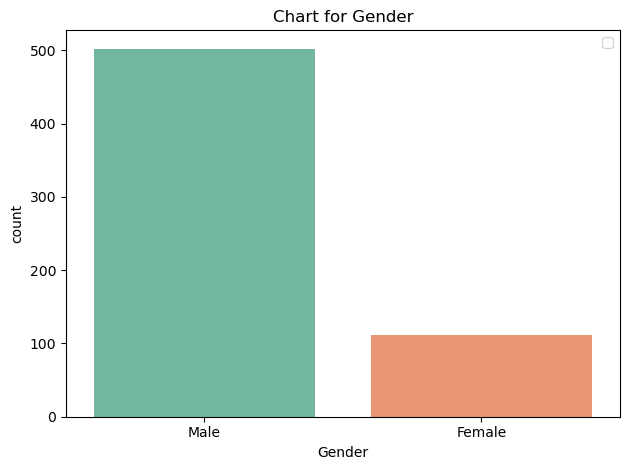

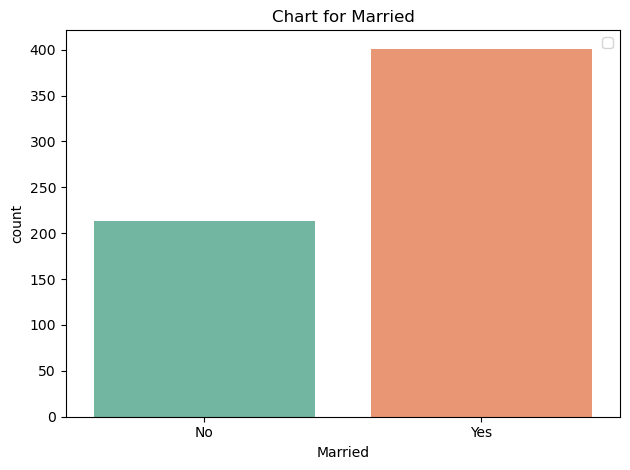

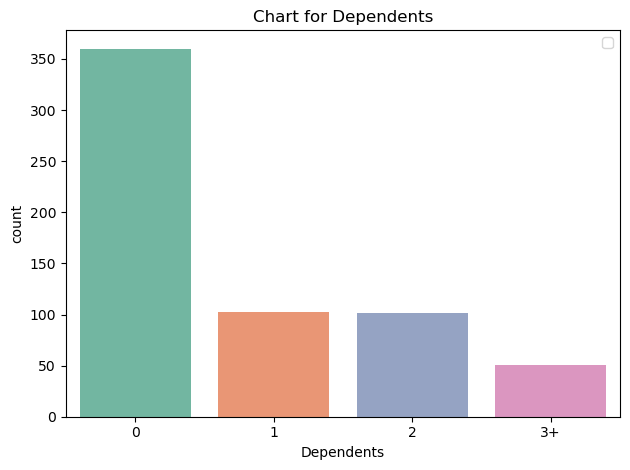

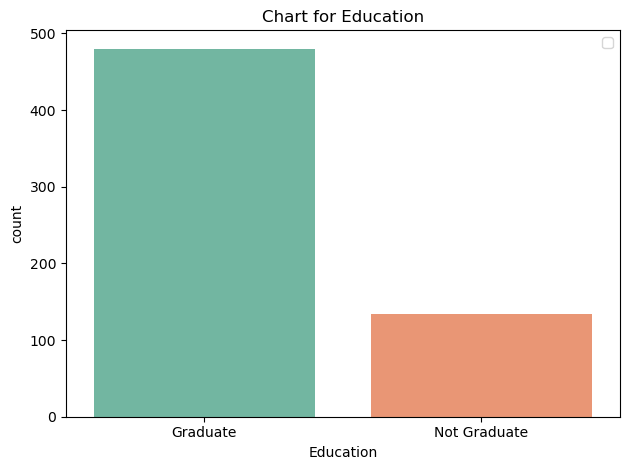

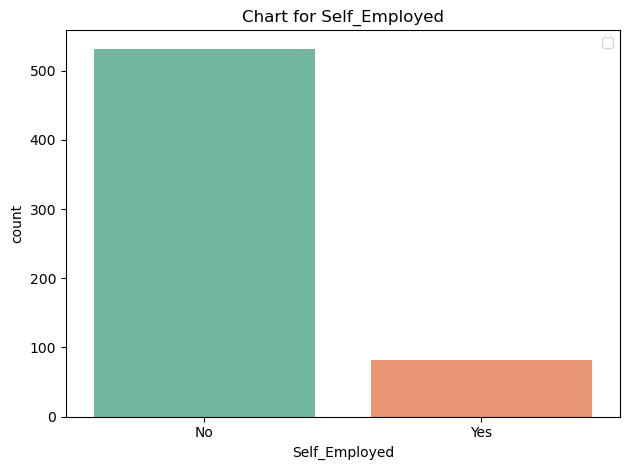

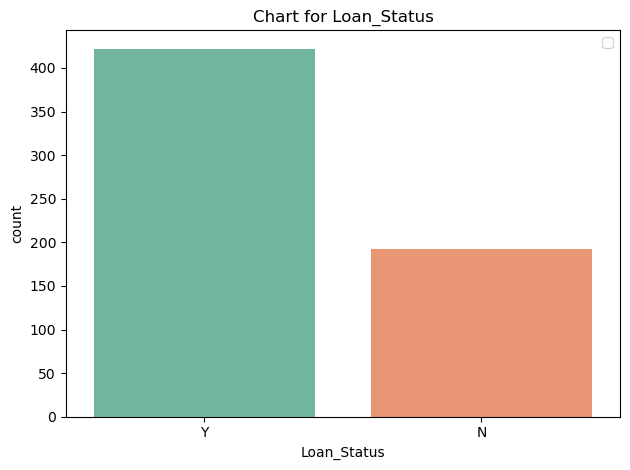

In [12]:
# Categorical Attributes visualization 

categorical = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Loan_Status']

for col in categorical:  
    sns.countplot(x=col, data=dataset, palette='Set2')
    plt.title(f"Chart for {col}") 
    plt.legend()
    plt.tight_layout()
    plt.show()

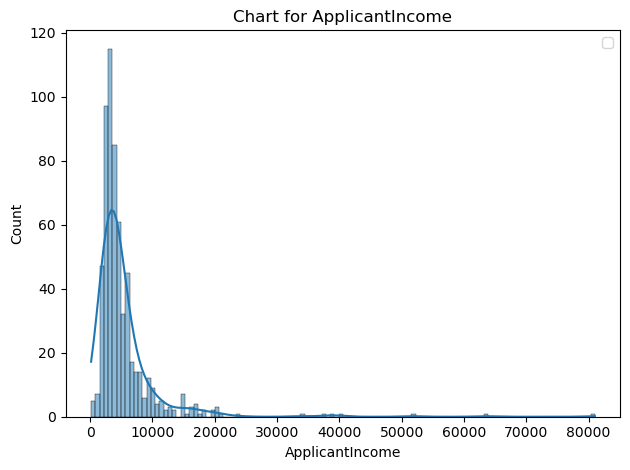

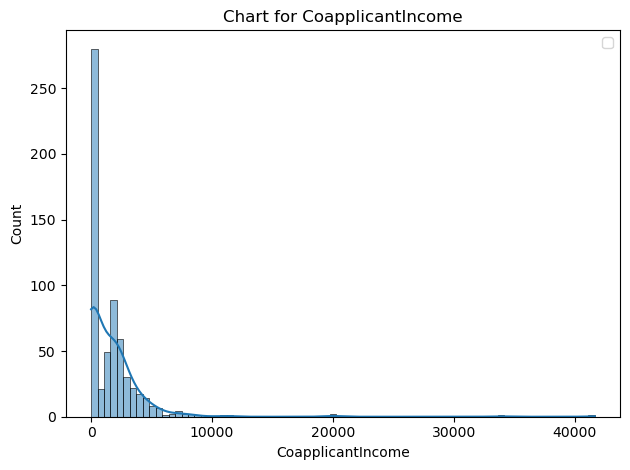

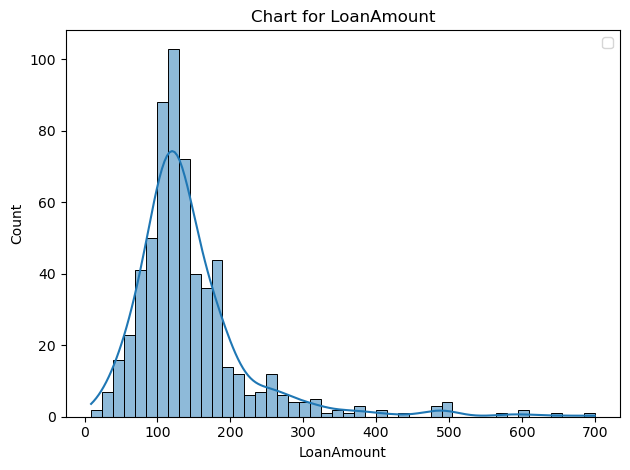

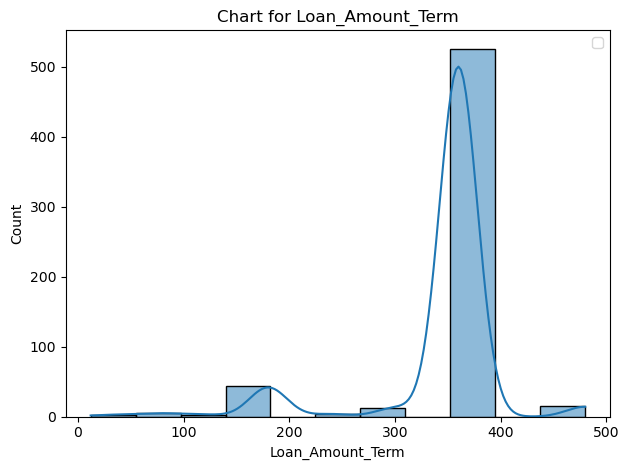

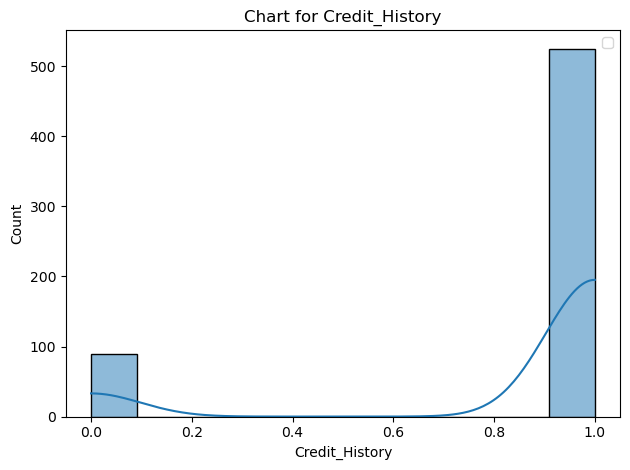

In [13]:
# Numercal Attributes visualization 

numerical = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History']

for col in numerical:  
    sns.histplot(x=col, data=dataset, kde=True)
    plt.title(f"Chart for {col}") 
    
    plt.legend()
    plt.tight_layout()
    plt.show()

### Corelation matrix ¶

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


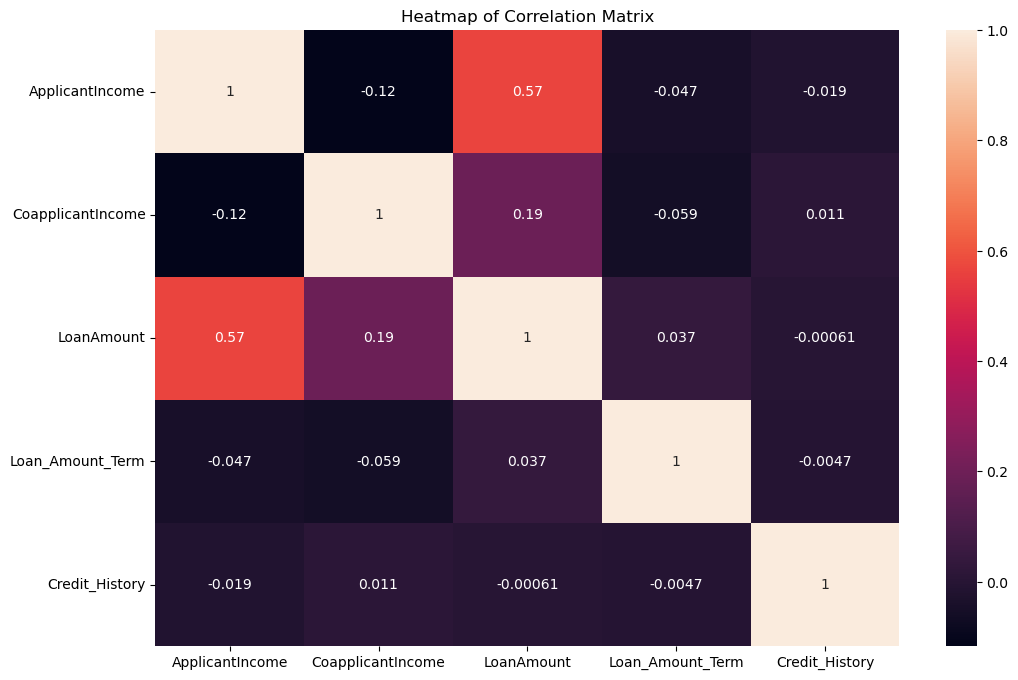

In [14]:
corr = dataset.corr(numeric_only=True)
Fib,ax = plt.subplots(figsize=(12,8))
# sns.heatmap(corr, annot=True, ax=ax, cmap='BuPu')
sns.heatmap(corr, annot=True)
plt.title('Heatmap of Correlation Matrix')
corr


Gender Value Counts:
Gender
Male      502
Female    112
Name: count, dtype: int64


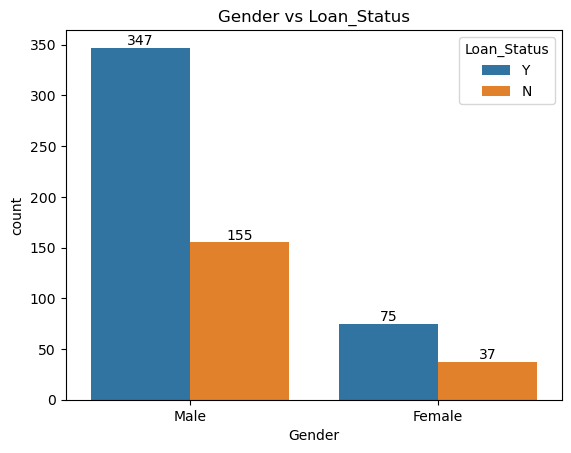


Married Value Counts:
Married
Yes    401
No     213
Name: count, dtype: int64


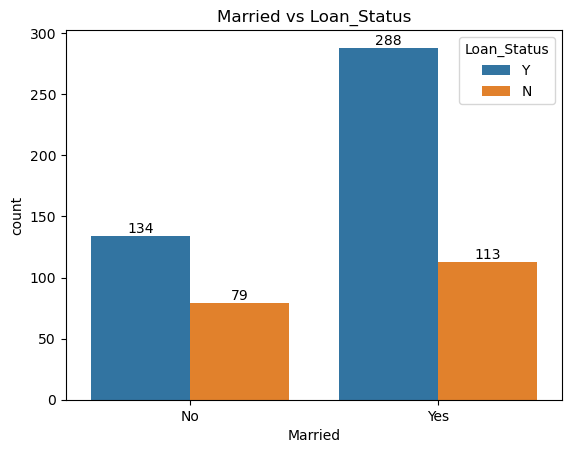


Dependents Value Counts:
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


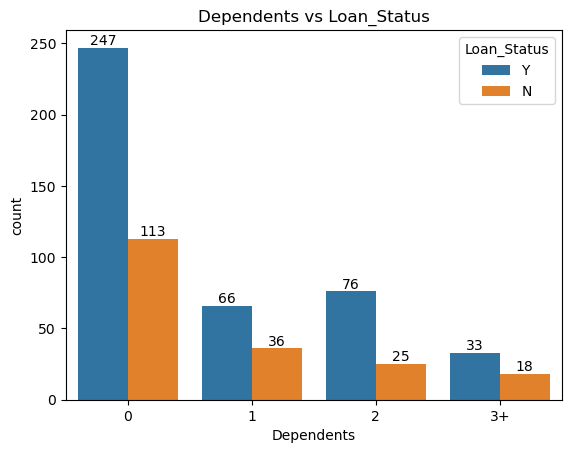


Education Value Counts:
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


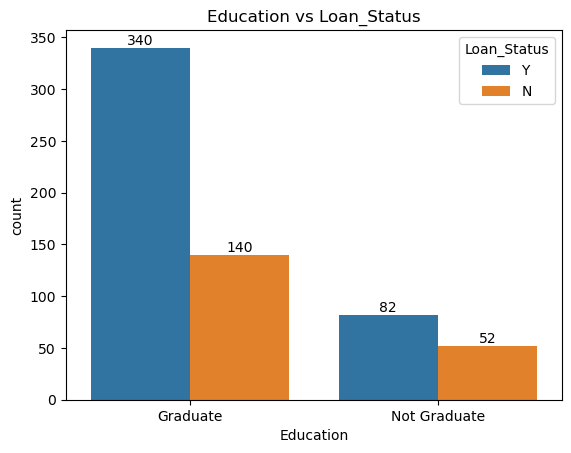


Self_Employed Value Counts:
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


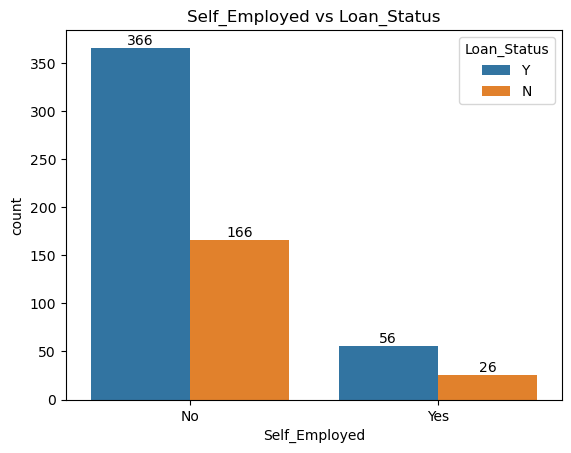


Property_Area Value Counts:
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


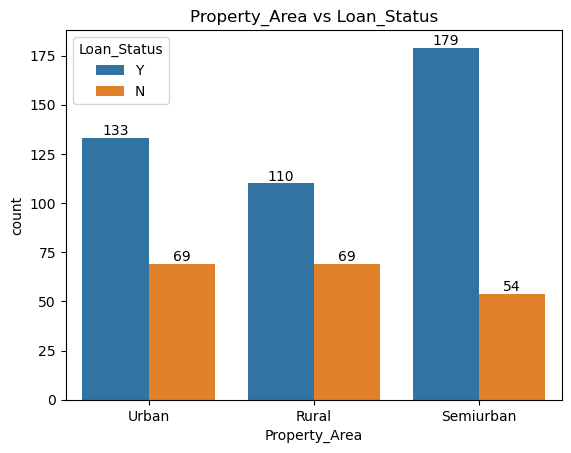

In [15]:
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
for col in cat_cols:
  print(f'\n{col} Value Counts:')
  print(dataset[col].value_counts())
  ax=sns.countplot(x=col, hue='Loan_Status', data=dataset)
  for container in ax.containers:
    ax.bar_label(container, label_type='edge')
  plt.title(f"{col} vs Loan_Status")
  plt.show()

### Drop unneccessary columns ¶

In [16]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


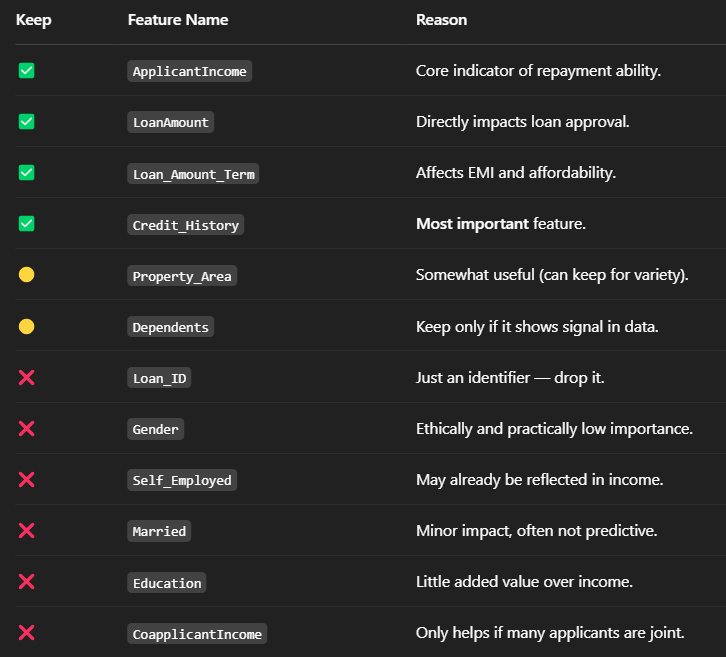

In [17]:
train_dataset = dataset.drop(columns=['Loan_ID', 'Gender', 'Education', 'Married', 'Self_Employed'])
print(train_dataset.head())

  Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0          0             5849                0.0       128.0   
1          1             4583             1508.0       128.0   
2          0             3000                0.0        66.0   
3          0             2583             2358.0       120.0   
4          0             6000                0.0       141.0   

   Loan_Amount_Term  Credit_History Property_Area Loan_Status  
0             360.0             1.0         Urban           Y  
1             360.0             1.0         Rural           N  
2             360.0             1.0         Urban           Y  
3             360.0             1.0         Urban           Y  
4             360.0             1.0         Urban           Y  


In [18]:
print(test_data.head())
print("---------------------------------------------------------------")
test_data_2 = test_data.drop(columns=['Loan_ID', 'Gender', 'Education', 'Married', 'Self_Employed'])
print(test_data_2.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             1.0     

In [19]:
df_train = train_dataset.copy()
df_test =  test_data_2.copy()

In [20]:
print(df_train.head(1))
print("---------------------------------------------------------------------------")
print(df_test.head(1))

  Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0          0             5849                0.0       128.0   

   Loan_Amount_Term  Credit_History Property_Area Loan_Status  
0             360.0             1.0         Urban           Y  
---------------------------------------------------------------------------
  Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0          0             5720                  0       110.0   

   Loan_Amount_Term  Credit_History Property_Area  
0             360.0             1.0         Urban  


### LabelEncoder ¶

In [21]:
from sklearn.preprocessing import LabelEncoder
# Categorical columns to encode
categorical_new = ['Dependents', 'Property_Area']
# Dictionary to store label encoders
label_encoders = {}
# Encode each categorical column in train and test
for col in categorical_new:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])      # Fit + transform on train
    df_test[col] = le.transform(df_test[col])            # Only transform on test
    label_encoders[col] = le                             # Save the encoder

# Encode the target column 'Loan_Status'
LabelEncoder_train = LabelEncoder()
df_train['Loan_Status'] = LabelEncoder_train.fit_transform(df_train['Loan_Status'])


In [22]:
df_train

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,4583,1508.0,128.0,360.0,1.0,0,0
2,0,3000,0.0,66.0,360.0,1.0,2,1
3,0,2583,2358.0,120.0,360.0,1.0,2,1
4,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,0,1
610,3,4106,0.0,40.0,180.0,1.0,0,1
611,1,8072,240.0,253.0,360.0,1.0,2,1
612,2,7583,0.0,187.0,360.0,1.0,2,1


In [23]:
df_test

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,5720,0,110.0,360.0,1.0,2
1,1,3076,1500,126.0,360.0,1.0,2
2,2,5000,1800,208.0,360.0,1.0,2
3,2,2340,2546,100.0,360.0,1.0,2
4,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...
362,3,4009,1777,113.0,360.0,1.0,2
363,0,4158,709,115.0,360.0,1.0,2
364,0,3250,1993,126.0,360.0,1.0,1
365,0,5000,2393,158.0,360.0,1.0,0


### Train- Test Split ¶

In [24]:
X = df_train.drop(columns=['Loan_Status'], axis=1)
y = df_train['Loan_Status']

In [25]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0)

#### After train and test data check

In [26]:
# shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (491, 7)
X_test shape: (123, 7)
y_train shape: (491,)
y_test shape: (123,)


In [27]:
# Show first 5 rows of each split
print("X_train:")
print(X_train.head())

print("\nX_test:")
print(X_test.head())

print("\ny_train:")
print(y_train.head())

print("\ny_test:")
print(y_test.head())

X_train:
     Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
90            0             2958             2900.0       131.0   
533           1            11250                0.0       196.0   
452           0             3948             1733.0       149.0   
355           0             3813                0.0       116.0   
266           2             4708             1387.0       150.0   

     Loan_Amount_Term  Credit_History  Property_Area  
90              360.0             1.0              1  
533             360.0             1.0              1  
452             360.0             0.0              0  
355             180.0             1.0              2  
266             360.0             1.0              1  

X_test:
     Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
454           0             7085                0.0        84.0   
52            0             4230                0.0       112.0   
536           0             6133             390

### Model Training ¶

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
def classify(model, X, y):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    # Fit the model
    model.fit(X_train, y_train)
    # Predict
    y_pred = model.predict(X_test)

    # Accuracy
    acc = model.score(X_test, y_test)
    print("Accuracy on Test Set:", round(acc * 100, 2), "%")
    # Cross-validation score
    score = cross_val_score(model, X, y, cv=5)
    print("Cross Validation Accuracy:", round(np.mean(score) * 100, 2), "%")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("\n Confusion Matrix:")
    print(cm)

    # Accuracy Score (redundant but explicit)
    ac = accuracy_score(y_test, y_pred)
    print("Accuracy :",ac)
    # print("Accuracy Score:", round(ac * 100, 2), "%")

    # Bias and Variance
    bias = model.score(X_train, y_train)
    print("Bias :",bias)
    variance = model.score(X_test, y_test)
    print("variance :",variance)
    # print("Bias (Train Score):", round(bias * 100, 2), "%")
    # print("Variance (Test Score):", round(variance * 100, 2), "%")


### 2nd Model training Code

In [29]:
    # from sklearn.preprocessing import StandardScaler
    # from sklearn.preprocessing import Normalizer
    # from sklearn.model_selection import train_test_split, cross_val_score
    # from sklearn.metrics import confusion_matrix, accuracy_score
    # import numpy as np
    # from sklearn.pipeline import Pipeline

    # def classify(model, X, y):
    #     # Split the data
    #     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

    #     # Create a pipeline for scaling + model
    #     pipe = Pipeline([
    #         ('scaler', Normalizer()),
    #         ('classifier', model)
    #     ])
    #     # Create a pipeline for scaling + model
    #     pipe = Pipeline([
    #         ('scaler', StandardScaler()),
    #         ('classifier', model)
    #     ])

    #     # Fit the model
    #     pipe.fit(X_train, y_train)

    #     # Predict
    #     y_pred = pipe.predict(X_test)

    #     # Accuracy on test set
    #     acc = pipe.score(X_test, y_test)
    #     print("Accuracy on Test Set:", round(acc * 100, 2), "%")

    #     # Cross-validation (with pipeline for scaling)
    #     score = cross_val_score(pipe, X, y, cv=5)
    #     print("Cross Validation Accuracy:", round(np.mean(score) * 100, 2), "%")

    #     # Confusion Matrix
    #     cm = confusion_matrix(y_test, y_pred)
    #     print("\n Confusion Matrix:")
    #     print(cm)

    #     # Accuracy Score
    #     ac = accuracy_score(y_test, y_pred)
    #     print("Accuracy Score:", round(ac * 100, 2))

    #     # Bias and Variance
    #     train_score = pipe.score(X_train, y_train)
    #     test_score = pipe.score(X_test, y_test)
    #     print("Bias (Train Accuracy):", round(train_score * 100, 2), "%")
    #     print("Variance (Test Accuracy):", round(test_score * 100, 2), "%")


### Check And run Model

In [30]:
from sklearn.svm import SVC
classifier = SVC()
classify(classifier, X, y)


Accuracy on Test Set: 82.93 %
Cross Validation Accuracy: 68.73 %

 Confusion Matrix:
[[14 19]
 [ 2 88]]
Accuracy : 0.8292682926829268
Bias : 0.8167006109979633
variance : 0.8292682926829268


In [31]:
from sklearn.svm import SVC
classifier = SVC()
classify(classifier, X, y)

Accuracy on Test Set: 82.93 %
Cross Validation Accuracy: 68.73 %

 Confusion Matrix:
[[14 19]
 [ 2 88]]
Accuracy : 0.8292682926829268
Bias : 0.8167006109979633
variance : 0.8292682926829268


In [32]:
from sklearn.linear_model import LogisticRegression
logreg  = LogisticRegression()
classify(logreg, X, y)

Accuracy on Test Set: 83.74 %
Cross Validation Accuracy: 81.11 %

 Confusion Matrix:
[[15 18]
 [ 2 88]]
Accuracy : 0.8373983739837398
Bias : 0.8065173116089613
variance : 0.8373983739837398


In [33]:
from sklearn.tree import DecisionTreeClassifier
dtree  = DecisionTreeClassifier()
classify(dtree , X, y)

Accuracy on Test Set: 66.67 %
Cross Validation Accuracy: 71.34 %

 Confusion Matrix:
[[18 15]
 [26 64]]
Accuracy : 0.6666666666666666
Bias : 1.0
variance : 0.6666666666666666


In [34]:
#Xgboost
from xgboost import XGBClassifier 
xgb = XGBClassifier()
classify(xgb, X, y)

Accuracy on Test Set: 79.67 %
Cross Validation Accuracy: 77.52 %

 Confusion Matrix:
[[19 14]
 [11 79]]
Accuracy : 0.7967479674796748
Bias : 0.9979633401221996
variance : 0.7967479674796748


In [35]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
rfc = RandomForestClassifier()
classify(rfc, X, y)

Accuracy on Test Set: 77.24 %
Cross Validation Accuracy: 78.18 %

 Confusion Matrix:
[[16 17]
 [11 79]]
Accuracy : 0.7723577235772358
Bias : 1.0
variance : 0.7723577235772358


In [36]:
etc = ExtraTreesClassifier()
classify(etc, X, y)

Accuracy on Test Set: 76.42 %
Cross Validation Accuracy: 76.06 %

 Confusion Matrix:
[[16 17]
 [12 78]]
Accuracy : 0.7642276422764228
Bias : 1.0
variance : 0.7642276422764228


In [37]:
LIR = LogisticRegression()
classify(LIR,X,y)

Accuracy on Test Set: 83.74 %
Cross Validation Accuracy: 81.11 %

 Confusion Matrix:
[[15 18]
 [ 2 88]]
Accuracy : 0.8373983739837398
Bias : 0.8065173116089613
variance : 0.8373983739837398


### Which Model Is Best?

#### Based on your results:

| Model                  | Test Accuracy | Cross-Validation | Bias (Train Score) | Variance (Test Score) |
|------------------------|---------------|------------------|--------------------|------------------------|
| **Logistic Regression**| **83.74%**     | **81.11%**        | 80.65%             | **83.74%**             |
| SVC (SVM)              | 82.93%        | 68.73%            | 81.06%             | 82.93%                 |
| XGBoost                | 79.67%        | 77.52%            | 99.80%             | 79.67%                 |
| Random Forest          | 79.67%        | 78.18%            | 100%               | 79.67%                 |
| Extra Trees            | 74.80%        | 77.20%            | 100%               | 74.80%                 |
| Decision Tree          | 69.11%        | 70.85%            | 100%               | 69.11%                 |

#### **Best Overall Model: Logistic Regression**
- Highest Test Accuracy: **83.74%**
- Cross-validation is also consistent: **81.11%**
- Bias and variance are **balanced** (low overfitting).

---

#### Part 2: **Which Model Belongs to Which ML Type?**

| Model                      | ML Type                  | Notes                                                                 |
|---------------------------|--------------------------|-----------------------------------------------------------------------|
| **Logistic Regression**    | **Supervised - Classification** | Linear model; great for binary classification problems.               |
| **SVC (SVM)**              | Supervised - Classification | Good for high-dimensional data; uses hyperplanes.                     |
| **Decision Tree**          | Supervised - Classification | Tree-based; can easily overfit.                                       |
| **Random Forest**          | Supervised - Classification | Ensemble (bagging); better than a single tree.                        |
| **Extra Trees Classifier** | Supervised - Classification | More randomness than RandomForest; faster and less overfitting.      |
| **XGBoost**                | Supervised - Classification | Ensemble (boosting); powerful and used in many Kaggle competitions.   |

---


### Hyperparameter Tunning ¶

In [38]:
from sklearn.linear_model import LogisticRegression
logreg  = LogisticRegression()
classify(logreg, X, y)

Accuracy on Test Set: 83.74 %
Cross Validation Accuracy: 81.11 %

 Confusion Matrix:
[[15 18]
 [ 2 88]]
Accuracy : 0.8373983739837398
Bias : 0.8065173116089613
variance : 0.8373983739837398


In [51]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(penalty='l1',    solver='liblinear',    dual=False,    tol=1e-4,
    C=100,    class_weight='balanced',    random_state=None,    max_iter=500
)
classify(lgr, X, y)


Accuracy on Test Set: 83.74 %
Cross Validation Accuracy: 79.8 %

 Confusion Matrix:
[[15 18]
 [ 2 88]]
Accuracy : 0.8373983739837398
Bias : 0.8044806517311609
variance : 0.8373983739837398


### Confussion Matrix ¶

In [52]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [53]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix (y_test, y_pred)
cm

array([[15, 18],
       [ 2, 88]], dtype=int64)

<Axes: >

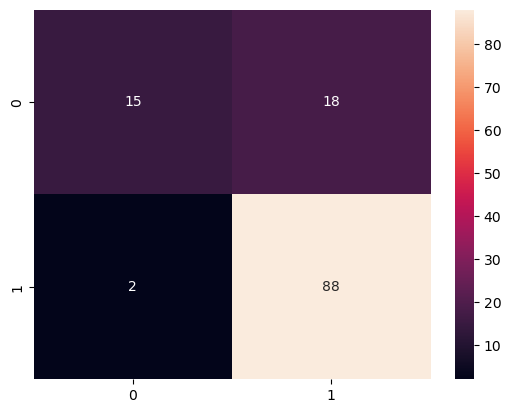

In [54]:
sns.heatmap(cm, annot=True)

### Predicting on the Test Dataset ¶

In [58]:
df_test.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,5720,0,110.0,360.0,1.0,2
1,1,3076,1500,126.0,360.0,1.0,2
2,2,5000,1800,208.0,360.0,1.0,2
3,2,2340,2546,100.0,360.0,1.0,2
4,0,3276,0,78.0,360.0,1.0,2


In [59]:
y_pred = model.predict(df_test)
df_test['Loan_Status'] = y_pred

In [60]:
df_test.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,5720,0,110.0,360.0,1.0,2,1
1,1,3076,1500,126.0,360.0,1.0,2,1
2,2,5000,1800,208.0,360.0,1.0,2,1
3,2,2340,2546,100.0,360.0,1.0,2,1
4,0,3276,0,78.0,360.0,1.0,2,1


In [62]:
df_test['Loan_Status'] = df_test['Loan_Status'].map({1: 'Y', 0: 'N'})
df_test.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,5720,0,110.0,360.0,1.0,2,Y
1,1,3076,1500,126.0,360.0,1.0,2,Y
2,2,5000,1800,208.0,360.0,1.0,2,Y
3,2,2340,2546,100.0,360.0,1.0,2,Y
4,0,3276,0,78.0,360.0,1.0,2,Y
